In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
import time
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense


In [4]:
keras.utils.set_random_seed(812)
tf.config.experimental.enable_op_determinism()

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000, 28, 28)


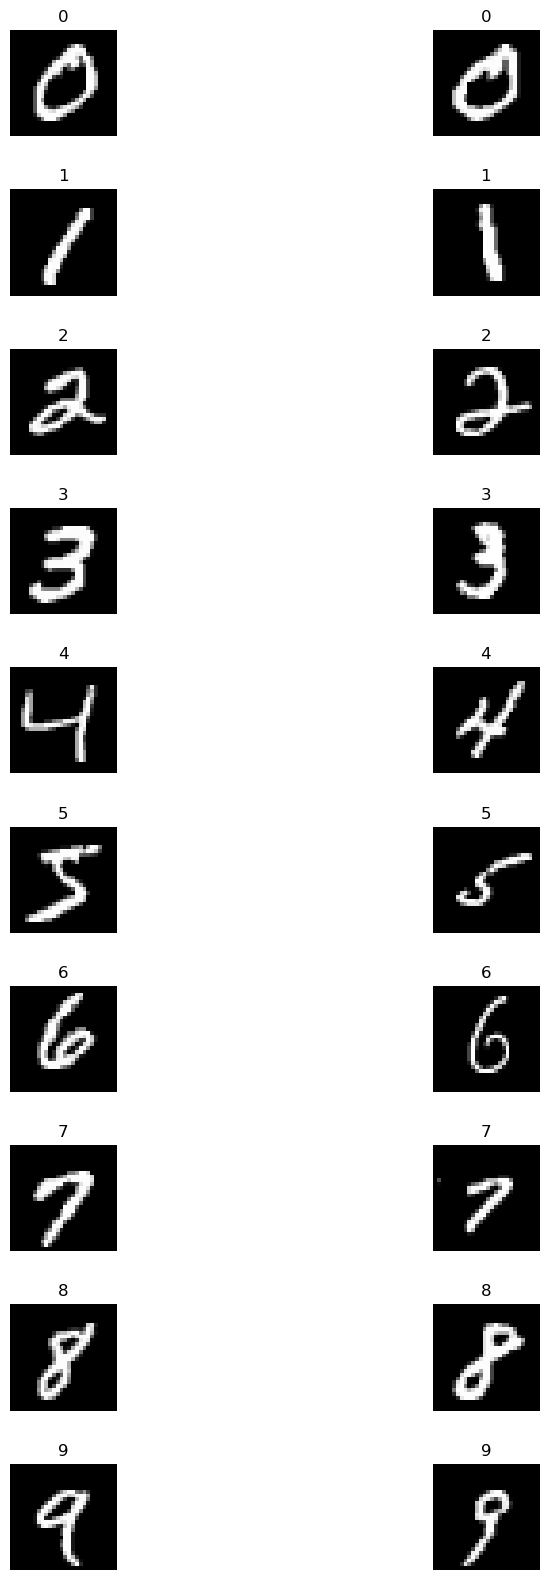

In [7]:
f, axarr = plt.subplots(10, 2, figsize=(10, 20))
for i in range(10):
    images = x_train[y_train==i]
    axarr[i, 0].imshow(images[0], cmap="gray")
    axarr[i, 1].imshow(images[1], cmap="gray")
    axarr[i, 0].axis('off')
    axarr[i, 1].axis('off')
    axarr[i, 0].set_title(str(i))
    axarr[i, 1].set_title(str(i))
plt.subplots_adjust(hspace=0.5)
plt.show()

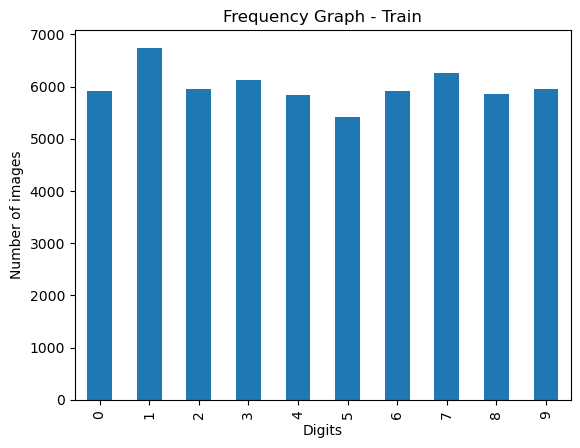

In [8]:
(pd.Series(y_train).value_counts())[[0,1,2,3,4,5,6,7,8,9]].plot.bar()
plt.title("Frequency Graph - Train")
plt.ylabel("Number of images")
plt.xlabel("Digits")
plt.show()


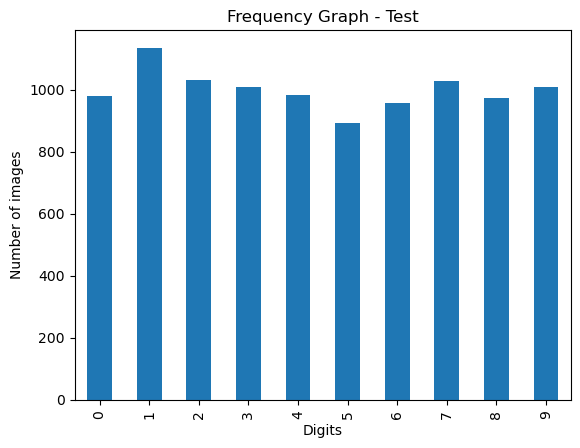

In [9]:
(pd.Series(y_test).value_counts())[[0,1,2,3,4,5,6,7,8,9]].plot.bar()
plt.title("Frequency Graph - Test")
plt.ylabel("Number of images")
plt.xlabel("Digits")
plt.show()

In [10]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1-(5/6), stratify=y_train)

In [11]:
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(50000, 28, 28)
(10000, 28, 28)
(50000,)
(10000,)


In [12]:
print(x_train.max(), x_val.max(), x_test.max())
print(x_train.min(), x_val.min(), x_test.min())

255 255 255
0 0 0


In [13]:
x_train, x_val, x_test = x_train.astype("float32")/255, x_val.astype("float32")/255, x_test.astype("float32")/255

In [14]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_val = x_val.reshape(x_val.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [15]:
print(x_train.shape[0])
print(x_val.shape[0])
print(x_test.shape[0])

50000
10000
10000


In [16]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [17]:
y_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [18]:
def plot(history, name):
    fig, ax = plt.subplots()
    plt.plot(history.history[name])
    plt.plot(history.history['val_' + name])
    plt.title('Model' + name.capitalize())
    plt.ylabel(name.capitalize())
    plt.xlabel('Epoch')
    fig.legend(["Train", "Validation"], loc="outside right upper")

In [19]:
columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer","# epochs","batch size","train loss","validation loss","train accuracy","validation accuracy","time (secs)"]
results = pd.DataFrame(columns=columns)

In [20]:
tf.keras.backend.clear_session()

In [21]:
model = Sequential()
model.add(Dense(num_classes, activation="softmax", input_dim=x_train.shape[1]))


C:\Users\ishika\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [24]:
batch_size=x_train.shape[0]
epochs=10

start = time.time()

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=batch_size, epochs=epochs)

end = time.time()

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0939 - loss: 2.3783 - val_accuracy: 0.0992 - val_loss: 2.3587
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.1002 - loss: 2.3631 - val_accuracy: 0.1060 - val_loss: 2.3440
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.1058 - loss: 2.3483 - val_accuracy: 0.1129 - val_loss: 2.3297
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.1121 - loss: 2.3340 - val_accuracy: 0.1190 - val_loss: 2.3158
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.1188 - loss: 2.3201 - val_accuracy: 0.1244 - val_loss: 2.3023
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.1252 - loss: 2.3066 - val_accuracy: 0.1302 - val_loss: 2.2892
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.1321 - loss: 2.2934 - val_accuracy: 0.1369 - val_loss: 2.2764
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.1389 - loss: 2.2806 - val_accuracy: 0.1466 - val_loss: 2.

In [25]:
print("Time taken in seconds ",end-start)

Time taken in seconds  3.080326795578003


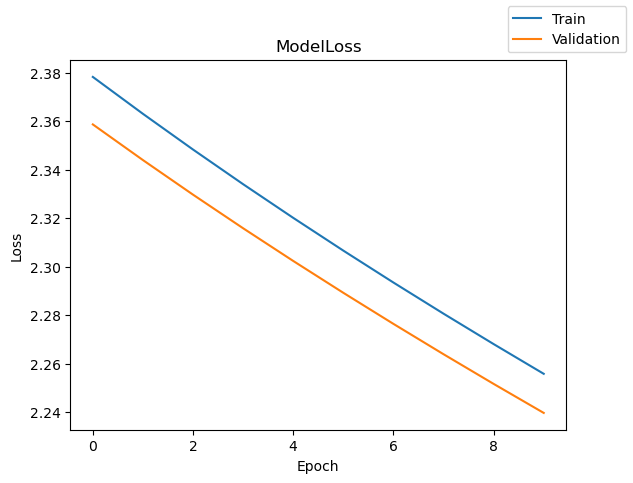

In [26]:
plot(history, 'loss')

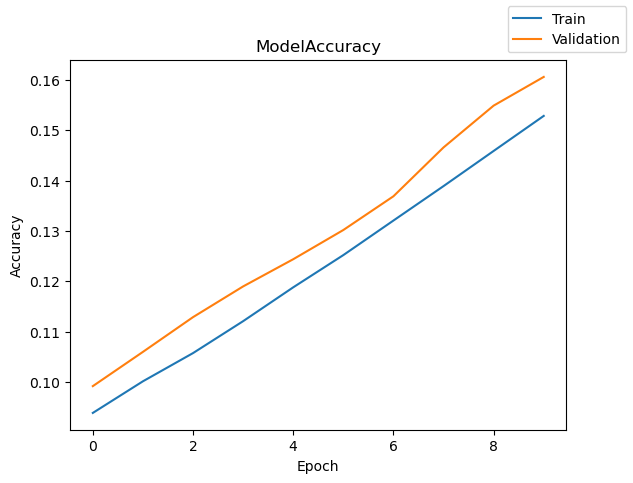

In [27]:
plot(history=history, name='accuracy')

In [28]:
results.loc[0]= [0,'-','-',10,50000,history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [29]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.255773,2.239635,0.15286,0.1606,3.08


In [30]:
tf.keras.backend.clear_session()

In [31]:
model = Sequential()
model.add (Dense(num_classes, activation="softmax", input_dim=x_train.shape[1]))


C:\Users\ishika\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
epochs=50
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [34]:
start=time.time()


history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=batch_size, epochs=epochs)

end = time.time()

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 914ms/step - accuracy: 0.0721 - loss: 2.4190 - val_accuracy: 0.0780 - val_loss: 2.4036
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.0743 - loss: 2.4042 - val_accuracy: 0.0808 - val_loss: 2.3893
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.0772 - loss: 2.3899 - val_accuracy: 0.0828 - val_loss: 2.3754
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.0802 - loss: 2.3760 - val_accuracy: 0.0855 - val_loss: 2.3620
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.0841 - loss: 2.3625 - val_accuracy: 0.0901 - val_loss: 2.3489
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.0875 - loss: 2.3493 - val_accuracy: 0.0942 - val_loss: 2.3361
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.0909 - loss: 2.3365 - val_accuracy: 0.0988 - val_loss: 2.3236
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.0953 - loss: 2.3240 - val_accuracy: 0.1048 - val_loss:

In [35]:
print('total time taken:', end-start)

total time taken: 11.0707368850708


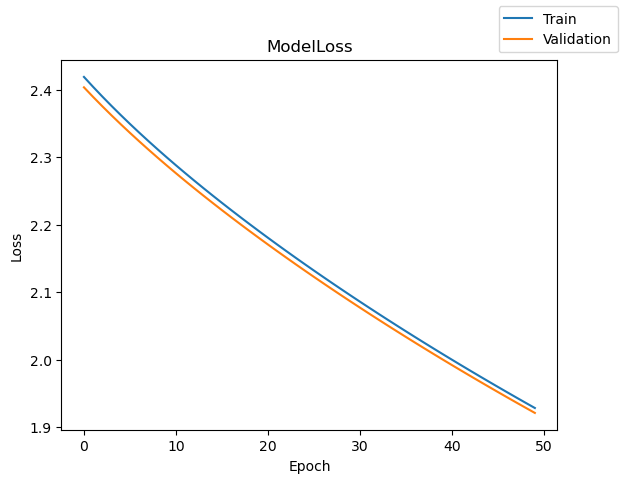

In [36]:
plot(history=history, name='loss')

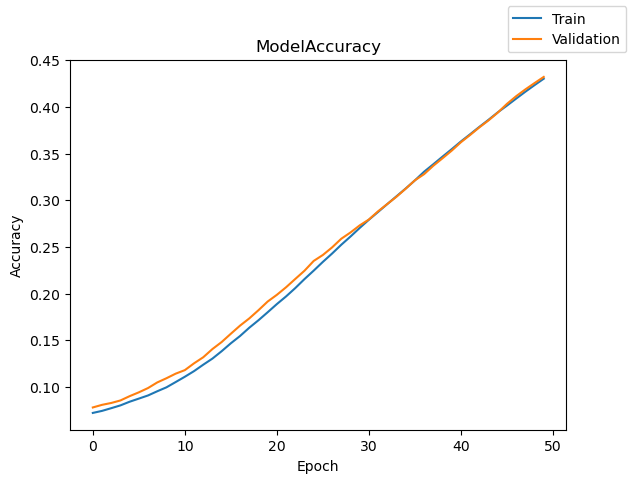

In [37]:
plot(history, 'accuracy')

In [38]:
results.loc[1]= [0,'-','-',50,50000,history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [39]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.255773,2.239635,0.15286,0.1606,3.08
1,0,-,-,50,50000,1.928251,1.920950,0.43028,0.4322,11.07


In [40]:
tf.keras.backend.clear_session()

In [39]:
model = Sequential()

model.add(Dense(num_classes, activation="softmax", input_dim=x_train.shape[1]))

model.compile(loss="categorical_crossentropy", optimizer="sgd" ,metrics=['accuracy'])

/opt/anaconda3/envs/tf220/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
batch_size=32
epochs=10

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=batch_size, epochs=epochs)



Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7623 - loss: 1.0702 - val_accuracy: 0.8721 - val_loss: 0.5271
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8719 - loss: 0.5002 - val_accuracy: 0.8861 - val_loss: 0.4382
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8854 - loss: 0.4297 - val_accuracy: 0.8932 - val_loss: 0.4010
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8913 - loss: 0.3971 - val_accuracy: 0.8975 - val_loss: 0.3793
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8963 - loss: 0.3772 - val_accuracy: 0.9012 - val_loss: 0.3648
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8994 - loss: 0.3634 - val_accuracy: 0.9039 - val_loss: 0.3542
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9017 - loss: 0.3532 - val_accuracy: 0.9062 - val_loss: 0.3461
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9037 - loss: 0.3451 - 

In [41]:
results.loc[2] = [0,'-','-',10,32,history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [42]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.255773,2.239635,0.15286,0.1606,1.26
1,0,-,-,50,50000,1.928251,1.920950,0.43028,0.4322,4.33
2,0,-,-,10,32,0.329002,0.330422,0.90828,0.9092,4.33


In [43]:
tf.keras.backend.clear_session()

In [44]:
model = Sequential()
model.add(Dense(num_classes, activation="softmax", input_dim = x_train.shape[1]))

/opt/anaconda3/envs/tf220/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [53]:
epochs = 50
batch_size=32

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size)

Epoch 1/50
 392/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.9199 - loss: 0.2891

2025-11-16 09:18:16.175821: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step - accuracy: 0.9238 - loss: 0.2729 - val_accuracy: 0.9210 - val_loss: 0.2876
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 434us/step - accuracy: 0.9240 - loss: 0.2725 - val_accuracy: 0.9211 - val_loss: 0.2873
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - accuracy: 0.9242 - loss: 0.2720 - val_accuracy: 0.9212 - val_loss: 0.2870
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 513us/step - accuracy: 0.9244 - loss: 0.2716 - val_accuracy: 0.9213 - val_loss: 0.2868
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 535us/step - accuracy: 0.9246 - loss: 0.2712 - val_accuracy: 0.9214 - val_loss: 0.2865
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 575us/step - accuracy: 0.9247 - loss: 0.2707 - val_accuracy: 0.9218 - val_loss: 0.2863
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step - accuracy: 0.9248 - loss: 0.2703 - val_accuracy: 0.9218 - val_loss: 0.2861
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 876us/step - accuracy: 0.9250 - loss: 0.26

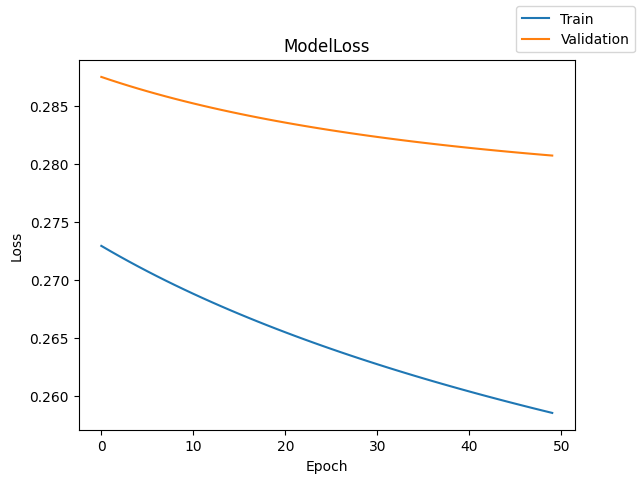

In [54]:
plot(history, 'loss')

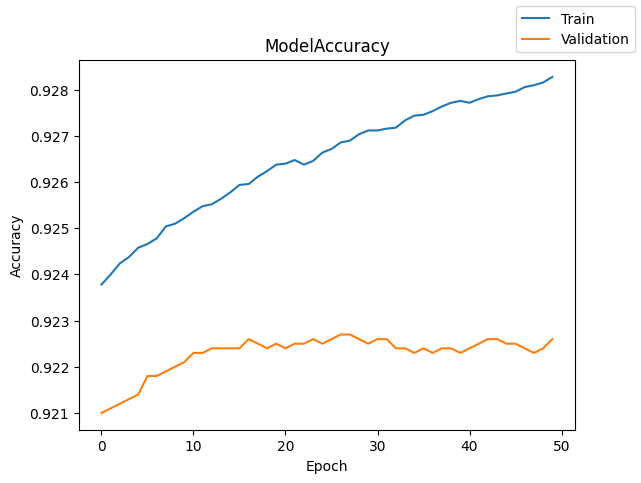

In [55]:
plot(history, 'accuracy')

In [56]:
results.loc[3] = [0,'-','-',50,32,history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [57]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.255773,2.239635,0.15286,0.1606,1.26
1,0,-,-,50,50000,1.928251,1.920950,0.43028,0.4322,4.33
2,0,-,-,10,32,0.329002,0.330422,0.90828,0.9092,4.33
3,0,-,-,50,32,0.258494,0.280753,0.92828,0.9226,4.33


In [58]:
#Model 4 - Increased batch_size to 64
tf.keras.backend.clear_session()

In [59]:
model = Sequential()
model.add(Dense(num_classes, activation="softmax", input_dim=x_train.shape[1]))


/opt/anaconda3/envs/tf220/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.compile(loss="categorical_crossentropy", metrics=['accuracy'], optimizer="sgd")

In [62]:
epochs=50
batch_size=64
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size)
end=time.time()

Epoch 1/50


2025-11-16 09:19:41.395368: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - accuracy: 0.7528 - loss: 1.0625 - val_accuracy: 0.8449 - val_loss: 0.6773
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.8591 - loss: 0.5928 - val_accuracy: 0.8685 - val_loss: 0.5322
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.8725 - loss: 0.5010 - val_accuracy: 0.8786 - val_loss: 0.4734
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.8798 - loss: 0.4566 - val_accuracy: 0.8842 - val_loss: 0.4400
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.8851 - loss: 0.4292 - val_accuracy: 0.8881 - val_loss: 0.4179
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.8890 - loss: 0.4102 - val_accuracy: 0.8916 - val_loss: 0.4019
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.8924 - loss: 0.3959 - val_accuracy: 0.8944 - val_loss: 0.3896
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.8949 - loss: 0.3847 - val_accurac

In [63]:
print("total time taken: ", end-start)

total time taken:  28.830672025680542


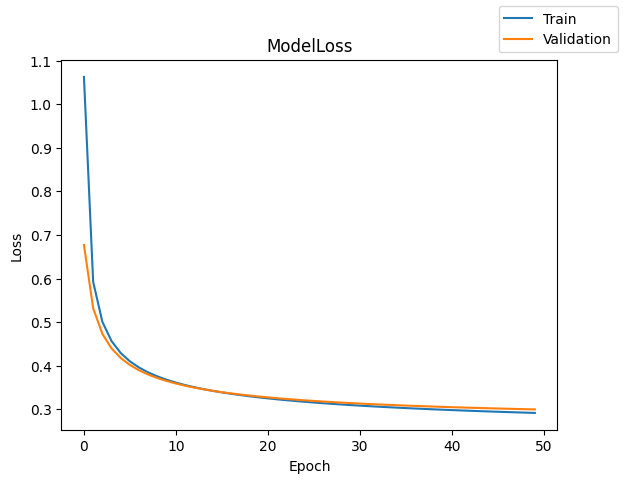

In [64]:
plot(history, 'loss')

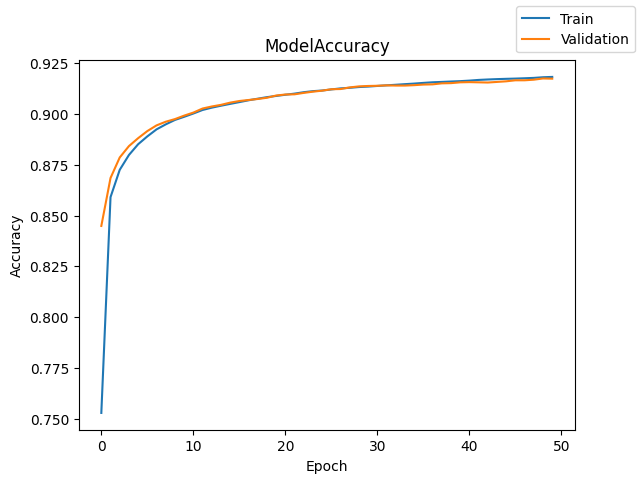

In [65]:
plot(history, 'accuracy')

In [66]:
results.loc[4] = [0, '-', '-', 50, 64, history.history['loss'][-1], history.history['val_loss'][-1], history.history['accuracy'][-1], history.history['val_accuracy'][-1], round(end-start, 2)]

In [67]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.255773,2.239635,0.15286,0.1606,1.26
1,0,-,-,50,50000,1.928251,1.920950,0.43028,0.4322,4.33
2,0,-,-,10,32,0.329002,0.330422,0.90828,0.9092,4.33
3,0,-,-,50,32,0.258494,0.280753,0.92828,0.9226,4.33
4,0,-,-,50,64,0.292000,0.300083,0.91826,0.9174,28.83


In [68]:
#model 5 - add a hidden layer and batch size is the shape of the dataset
tf.keras.backend.clear_session()

In [69]:
model = Sequential()
model.add(Dense(64, activation="sigmoid", input_dim=x_train.shape[1]))
model.add(Dense(num_classes, activation="softmax"))

/opt/anaconda3/envs/tf220/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

In [72]:
epochs = 50
batch_size = x_train.shape[0]
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size)
end = time.time()

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - accuracy: 0.0942 - loss: 2.4433 - val_accuracy: 0.0945 - val_loss: 2.4366
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.0942 - loss: 2.4356 - val_accuracy: 0.0945 - val_loss: 2.4293


2025-11-16 09:20:24.312126: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.0945 - loss: 2.4282 - val_accuracy: 0.0948 - val_loss: 2.4223
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.0944 - loss: 2.4212 - val_accuracy: 0.0955 - val_loss: 2.4156
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.0947 - loss: 2.4146 - val_accuracy: 0.0965 - val_loss: 2.4093
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.0953 - loss: 2.4082 - val_accuracy: 0.0972 - val_loss: 2.4032
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.0955 - loss: 2.4021 - val_accuracy: 0.0975 - val_loss: 2.3974
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.0961 - loss: 2.3963 - val_accuracy: 0.0974 - val_loss: 2.3919
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.0966 - loss: 2.3908 - val_accuracy: 0.0979 - val_loss: 2.3865
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.0972 - loss: 2.3854 - val_accuracy: 0.0982 - val_loss: 2.38

In [73]:
print("total time taken: ", end-start)

total time taken:  7.472980976104736


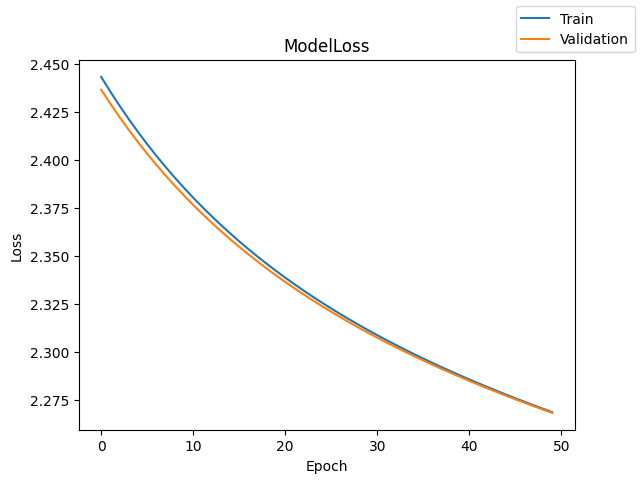

In [74]:
plot(history, 'loss')

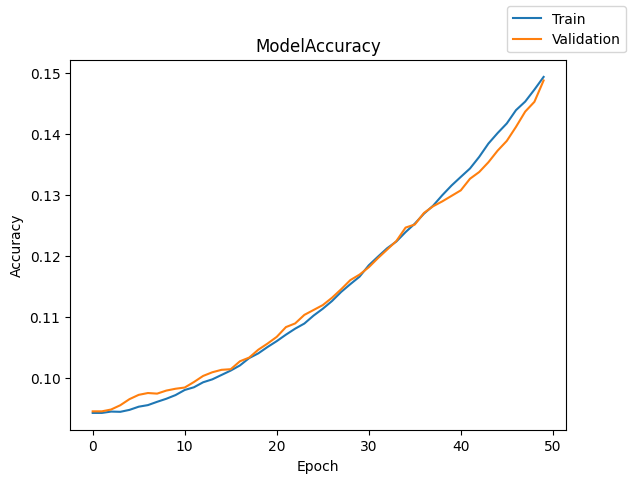

In [75]:
plot(history, 'accuracy')

In [76]:
results.loc[5] = [1, 64, 'sigmoid', 50, 50000, history.history['loss'][-1], history.history['val_loss'][-1], history.history['accuracy'][-1], history.history['val_accuracy'][-1], round(end-start,2)]

In [77]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.255773,2.239635,0.15286,0.1606,1.26
1,0,-,-,50,50000,1.928251,1.920950,0.43028,0.4322,4.33
2,0,-,-,10,32,0.329002,0.330422,0.90828,0.9092,4.33
3,0,-,-,50,32,0.258494,0.280753,0.92828,0.9226,4.33
4,0,-,-,50,64,0.292000,0.300083,0.91826,0.9174,28.83
5,1,64,sigmoid,50,50000,2.268572,2.268149,0.14928,0.1487,7.47


In [78]:
#model 6 - reducing the batch size to 32 for model 5
tf.keras.backend.clear_session()

In [79]:
model = Sequential()
model.add(Dense(64, activation="sigmoid", input_dim=x_train.shape[1]))
model.add(Dense(num_classes, activation="softmax"))

/opt/anaconda3/envs/tf220/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [80]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

In [82]:

epochs= 50
batch_size = 32
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size)
end = time.time()

Epoch 1/50


2025-11-16 09:20:41.356981: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 628us/step - accuracy: 0.6439 - loss: 1.6083 - val_accuracy: 0.7842 - val_loss: 1.0883
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 554us/step - accuracy: 0.8250 - loss: 0.8625 - val_accuracy: 0.8489 - val_loss: 0.7018
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 582us/step - accuracy: 0.8605 - loss: 0.6232 - val_accuracy: 0.8682 - val_loss: 0.5553
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 656us/step - accuracy: 0.8758 - loss: 0.5179 - val_accuracy: 0.8799 - val_loss: 0.4799
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 685us/step - accuracy: 0.8855 - loss: 0.4587 - val_accuracy: 0.8873 - val_loss: 0.4340
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 815us/step - accuracy: 0.8908 - loss: 0.4208 - val_accuracy: 0.8922 - val_loss: 0.4030
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8948 - loss: 0.3941 - val_accuracy: 0.8975 - val_loss: 0.3805
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8986 - loss: 0.3741 -

In [83]:
print("Total time taken: ", end-start)

Total time taken:  73.28764700889587


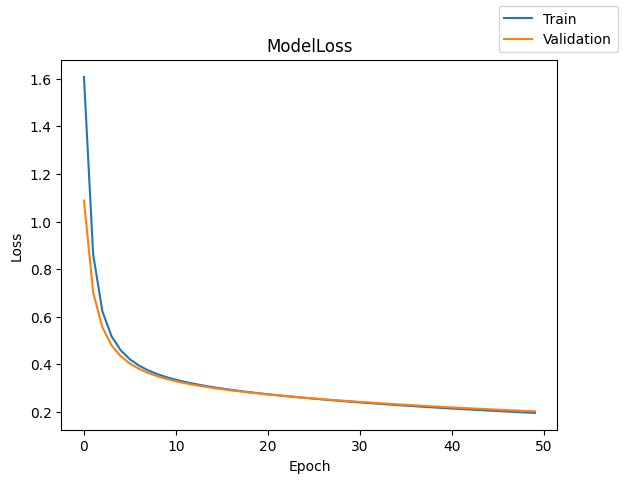

In [84]:
plot(history, 'loss')

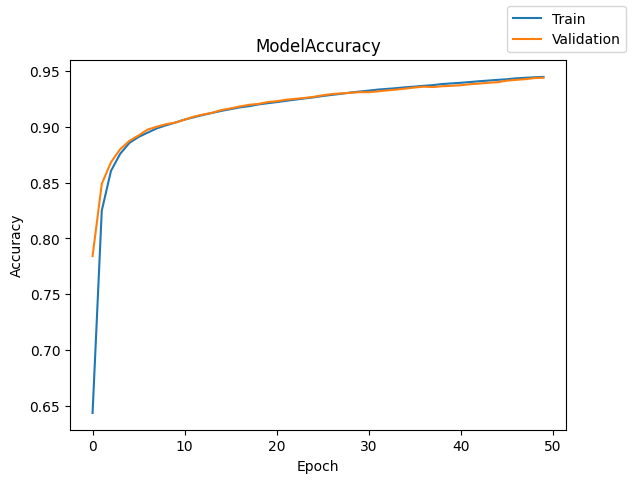

In [85]:
plot(history, 'accuracy')

In [86]:
results.loc[6] = [1, 64, 'sigmoid', 50, 32, history.history['loss'][-1], history.history['val_loss'][-1], history.history['accuracy'][-1], history.history['val_accuracy'][-1], round(end-start,2)]

In [87]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.255773,2.239635,0.15286,0.1606,1.26
1,0,-,-,50,50000,1.928251,1.920950,0.43028,0.4322,4.33
2,0,-,-,10,32,0.329002,0.330422,0.90828,0.9092,4.33
3,0,-,-,50,32,0.258494,0.280753,0.92828,0.9226,4.33
4,0,-,-,50,64,0.292000,0.300083,0.91826,0.9174,28.83
5,1,64,sigmoid,50,50000,2.268572,2.268149,0.14928,0.1487,7.47
6,1,64,sigmoid,50,32,0.195624,0.202316,0.94454,0.9438,73.29


In [88]:
#Model 8 - Adding more neurons to the activation layer
tf.keras.backend.clear_session()

In [89]:
model = Sequential()
model.add(Dense(128, activation="sigmoid", input_dim = x_train.shape[1]))
model.add(Dense(num_classes, activation="softmax"))


/opt/anaconda3/envs/tf220/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [90]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

In [92]:
epochs=50
batch_size=32

start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size)
end = time.time()

Epoch 1/50


2025-11-16 09:22:04.281306: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - accuracy: 0.6820 - loss: 1.5307 - val_accuracy: 0.8153 - val_loss: 0.9827
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 718us/step - accuracy: 0.8383 - loss: 0.7766 - val_accuracy: 0.8549 - val_loss: 0.6371
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 815us/step - accuracy: 0.8652 - loss: 0.5706 - val_accuracy: 0.8727 - val_loss: 0.5149
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8781 - loss: 0.4833 - val_accuracy: 0.8823 - val_loss: 0.4528
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8857 - loss: 0.4347 - val_accuracy: 0.8883 - val_loss: 0.4151
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8903 - loss: 0.4034 - val_accuracy: 0.8945 - val_loss: 0.3895
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8946 - loss: 0.3814 - val_accuracy: 0.8984 - val_loss: 0.3708
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - accuracy: 0.8983 - loss: 0.3648 - val

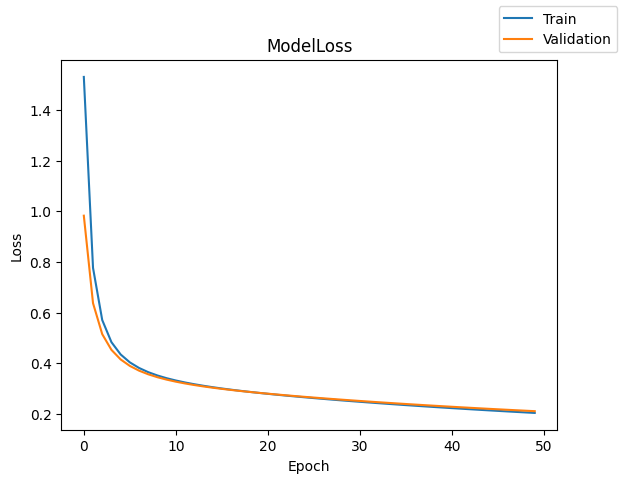

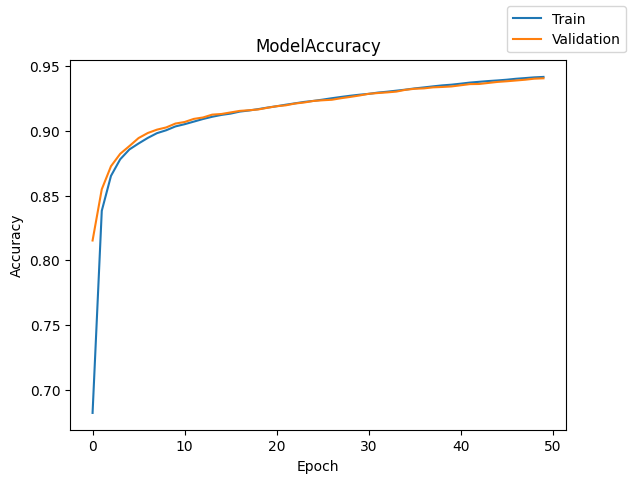

In [93]:
plot(history, 'loss')
plot(history, 'accuracy')

In [94]:
results.loc[7] = [1, 128, "sigmoid", 50, 32, history.history['loss'][-1], history.history['val_loss'][-1], history.history['accuracy'][-1], history.history['val_accuracy'][-1], round(end-start, 2)]

In [95]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.255773,2.239635,0.15286,0.1606,1.26
1,0,-,-,50,50000,1.928251,1.920950,0.43028,0.4322,4.33
2,0,-,-,10,32,0.329002,0.330422,0.90828,0.9092,4.33
3,0,-,-,50,32,0.258494,0.280753,0.92828,0.9226,4.33
4,0,-,-,50,64,0.292000,0.300083,0.91826,0.9174,28.83
5,1,64,sigmoid,50,50000,2.268572,2.268149,0.14928,0.1487,7.47
6,1,64,sigmoid,50,32,0.195624,0.202316,0.94454,0.9438,73.29
7,1,128,sigmoid,50,32,0.203806,0.210716,0.94176,0.9407,88.16


In [96]:
#Model 9 changing the activation function on the hidden layer
tf.keras.backend.clear_session()

In [97]:
model = Sequential()
model.add(Dense(128, activation='tanh', input_dim = x_train.shape[1]))
model.add(Dense(num_classes, activation="softmax"))

/opt/anaconda3/envs/tf220/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [98]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [99]:
model.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [100]:
epochs = 50
batch_size=32

start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size)
end = time.time()

Epoch 1/50


2025-11-16 09:23:41.495139: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - accuracy: 0.8298 - loss: 0.6623 - val_accuracy: 0.8887 - val_loss: 0.4110
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 623us/step - accuracy: 0.8957 - loss: 0.3743 - val_accuracy: 0.9027 - val_loss: 0.3449
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 690us/step - accuracy: 0.9065 - loss: 0.3295 - val_accuracy: 0.9107 - val_loss: 0.3159
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 767us/step - accuracy: 0.9134 - loss: 0.3047 - val_accuracy: 0.9164 - val_loss: 0.2971
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 892us/step - accuracy: 0.9183 - loss: 0.2866 - val_accuracy: 0.9203 - val_loss: 0.2824
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9227 - loss: 0.2717 - val_accuracy: 0.9237 - val_loss: 0.2698
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9264 - loss: 0.2584 - val_accuracy: 0.9260 - val_loss: 0.2585
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9296 - loss: 0.2464 - v

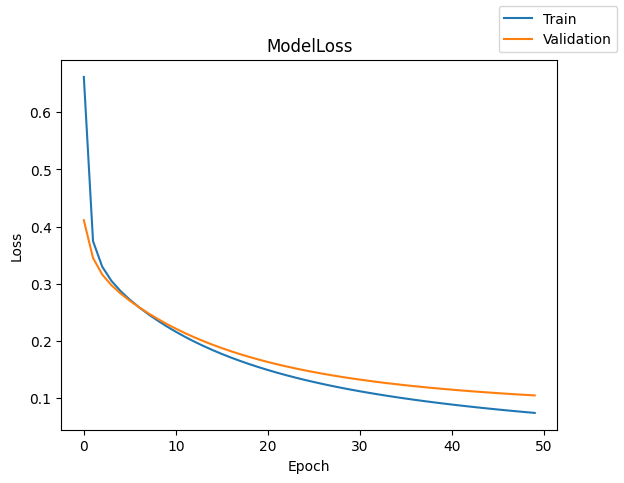

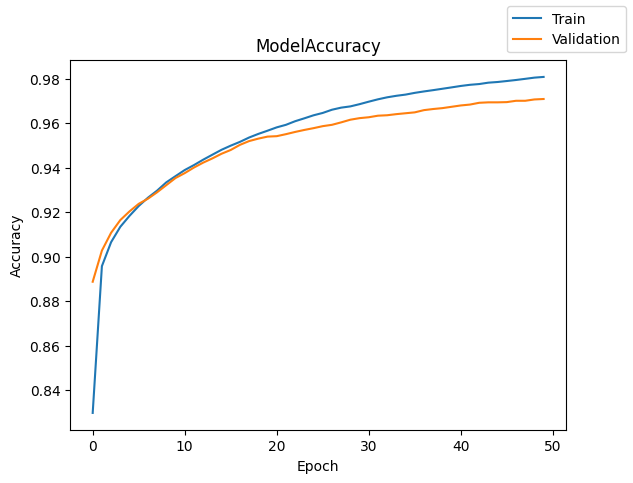

In [101]:
plot(history, 'loss')
plot(history, 'accuracy')

In [102]:
results.loc[8] = [1, 128, "tanh", 50, 32, history.history['loss'][-1], history.history['val_loss'][-1], history.history['accuracy'][-1], history.history['val_accuracy'][-1], round(end-start, 2)]

In [103]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.255773,2.239635,0.15286,0.1606,1.26
1,0,-,-,50,50000,1.928251,1.920950,0.43028,0.4322,4.33
2,0,-,-,10,32,0.329002,0.330422,0.90828,0.9092,4.33
3,0,-,-,50,32,0.258494,0.280753,0.92828,0.9226,4.33
4,0,-,-,50,64,0.292000,0.300083,0.91826,0.9174,28.83
5,1,64,sigmoid,50,50000,2.268572,2.268149,0.14928,0.1487,7.47
6,1,64,sigmoid,50,32,0.195624,0.202316,0.94454,0.9438,73.29
7,1,128,sigmoid,50,32,0.203806,0.210716,0.94176,0.9407,88.16
8,1,128,tanh,50,32,0.073164,0.103856,0.98072,0.9708,83.92


In [104]:
#Model 9 - Try the same model with "relu" as the activation function
tf.keras.backend.clear_session()

In [105]:
model = Sequential()
model.add(Dense(128, activation="relu", input_dim = x_train.shape[1]))
model.add(Dense(num_classes, activation="softmax"))

/opt/anaconda3/envs/tf220/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [106]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [107]:
model.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [108]:
epochs= 50
batch_size=64
start = time.time()
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size)
end = time.time()


Epoch 1/50


2025-11-16 09:25:13.506506: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 939us/step - accuracy: 0.7551 - loss: 1.0044 - val_accuracy: 0.8675 - val_loss: 0.5349
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 793us/step - accuracy: 0.8802 - loss: 0.4568 - val_accuracy: 0.8926 - val_loss: 0.4008
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 804us/step - accuracy: 0.8962 - loss: 0.3766 - val_accuracy: 0.9031 - val_loss: 0.3521
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 864us/step - accuracy: 0.9051 - loss: 0.3394 - val_accuracy: 0.9087 - val_loss: 0.3243
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step - accuracy: 0.9114 - loss: 0.3157 - val_accuracy: 0.9153 - val_loss: 0.3051
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 978us/step - accuracy: 0.9160 - loss: 0.2979 - val_accuracy: 0.9186 - val_loss: 0.2900
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9203 - loss: 0.2833 - val_accuracy: 0.9231 - val_loss: 0.2773
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9243 - loss: 0.2707 - val_accuracy: 0

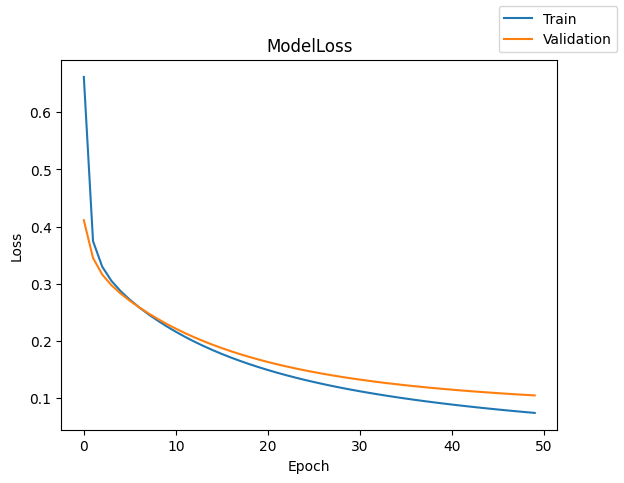

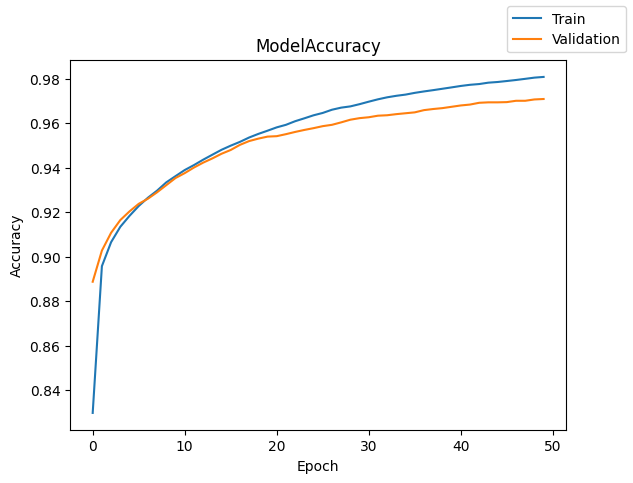

In [109]:
plot(history, 'loss')
plot(history, 'accuracy')

In [110]:
results.loc[9] = [1, 128, "relu", 50, 64, history.history['loss'][-1], history.history['val_loss'][-1], history.history['accuracy'][-1], history.history['val_accuracy'][-1], round(end-start,2)]

In [111]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.255773,2.239635,0.15286,0.1606,1.26
1,0,-,-,50,50000,1.928251,1.920950,0.43028,0.4322,4.33
2,0,-,-,10,32,0.329002,0.330422,0.90828,0.9092,4.33
3,0,-,-,50,32,0.258494,0.280753,0.92828,0.9226,4.33
4,0,-,-,50,64,0.292000,0.300083,0.91826,0.9174,28.83
5,1,64,sigmoid,50,50000,2.268572,2.268149,0.14928,0.1487,7.47
6,1,64,sigmoid,50,32,0.195624,0.202316,0.94454,0.9438,73.29
7,1,128,sigmoid,50,32,0.203806,0.210716,0.94176,0.9407,88.16
8,1,128,tanh,50,32,0.073164,0.103856,0.98072,0.9708,83.92
9,1,128,relu,50,64,0.073164,0.103856,0.98072,0.9708,57.55


In [112]:
#Model 10 - Adding another activatino layer
tf.keras.backend.clear_session()

In [113]:
model = Sequential()
model.add(Dense(128, activation="relu", input_dim=x_train.shape[1]))
model.add(Dense(64, activation="tanh"))
model.add(Dense(num_classes, activation="softmax"))
model.summary()

/opt/anaconda3/envs/tf220/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [114]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

In [115]:
epochs = 50
batch_size=64
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size)
end = time.time()

Epoch 1/50


2025-11-16 09:26:35.652876: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7661 - loss: 0.9504 - val_accuracy: 0.8758 - val_loss: 0.4940
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 828us/step - accuracy: 0.8912 - loss: 0.4153 - val_accuracy: 0.9031 - val_loss: 0.3613
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 823us/step - accuracy: 0.9082 - loss: 0.3326 - val_accuracy: 0.9160 - val_loss: 0.3082
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 841us/step - accuracy: 0.9190 - loss: 0.2911 - val_accuracy: 0.9243 - val_loss: 0.2763
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - accuracy: 0.9257 - loss: 0.2635 - val_accuracy: 0.9295 - val_loss: 0.2539
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 844us/step - accuracy: 0.9311 - loss: 0.2427 - val_accuracy: 0.9344 - val_loss: 0.2367
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 826us/step - accuracy: 0.9354 - loss: 0.2259 - val_accuracy: 0.9374 - val_loss: 0.2228
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 850us/step - accuracy: 0.9391 - loss: 0.2119 - val_accuracy:

In [116]:
print("total time taken: ", end-start)

total time taken:  58.95307803153992


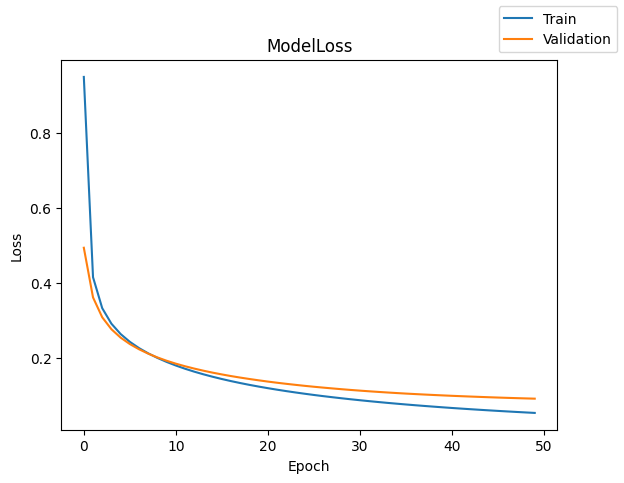

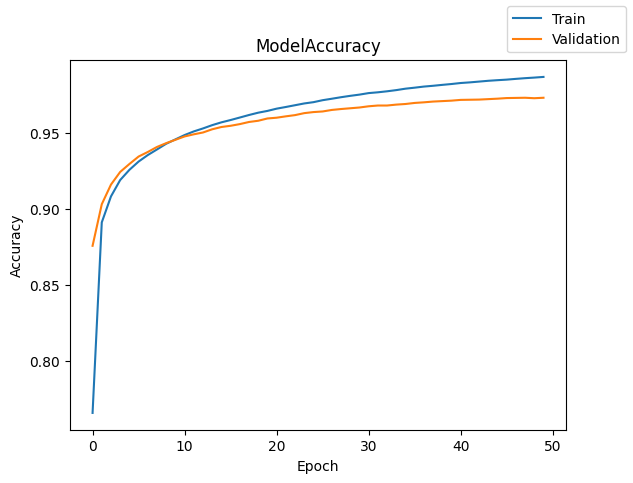

In [117]:
plot(history, 'loss')
plot(history, 'accuracy')

In [118]:
results.loc[10] = [2, [128, 64], ['relu', 'tanh'], 50, 64, history.history['loss'][-1], history.history['val_accuracy'][-1], history.history['accuracy'][-1], history.history['val_accuracy'][-1], round(end-start,2)]

In [119]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.255773,2.239635,0.15286,0.1606,1.26
1,0,-,-,50,50000,1.928251,1.920950,0.43028,0.4322,4.33
2,0,-,-,10,32,0.329002,0.330422,0.90828,0.9092,4.33
3,0,-,-,50,32,0.258494,0.280753,0.92828,0.9226,4.33
4,0,-,-,50,64,0.292000,0.300083,0.91826,0.9174,28.83
5,1,64,sigmoid,50,50000,2.268572,2.268149,0.14928,0.1487,7.47
6,1,64,sigmoid,50,32,0.195624,0.202316,0.94454,0.9438,73.29
7,1,128,sigmoid,50,32,0.203806,0.210716,0.94176,0.9407,88.16
8,1,128,tanh,50,32,0.073164,0.103856,0.98072,0.9708,83.92
9,1,128,relu,50,64,0.073164,0.103856,0.98072,0.9708,57.55


In [120]:
#Model 11 - reversing the activations for hidden layer
tf.keras.backend.clear_session()

In [121]:
model=Sequential()
model.add(Dense(128, activation="tanh", input_dim = x_train.shape[1]))
model.add(Dense(64, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))
model.summary()

/opt/anaconda3/envs/tf220/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [122]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

In [123]:
epochs=50
batch_size=64
start= time.time()
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size)
end = time.time()

Epoch 1/50


2025-11-16 09:27:41.153699: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7698 - loss: 0.9292 - val_accuracy: 0.8716 - val_loss: 0.4822
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 863us/step - accuracy: 0.8882 - loss: 0.4113 - val_accuracy: 0.8991 - val_loss: 0.3636
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 987us/step - accuracy: 0.9032 - loss: 0.3393 - val_accuracy: 0.9094 - val_loss: 0.3182
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9120 - loss: 0.3037 - val_accuracy: 0.9173 - val_loss: 0.2910
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9183 - loss: 0.2796 - val_accuracy: 0.9224 - val_loss: 0.2714
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9236 - loss: 0.2610 - val_accuracy: 0.9279 - val_loss: 0.2558
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9281 - loss: 0.2456 - val_accuracy: 0.9307 - val_loss: 0.2429
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9321 - loss: 0.2325 - val_accuracy: 0.9330 - 

In [124]:
print("total time taken: ", end-start)

total time taken:  61.846144914627075


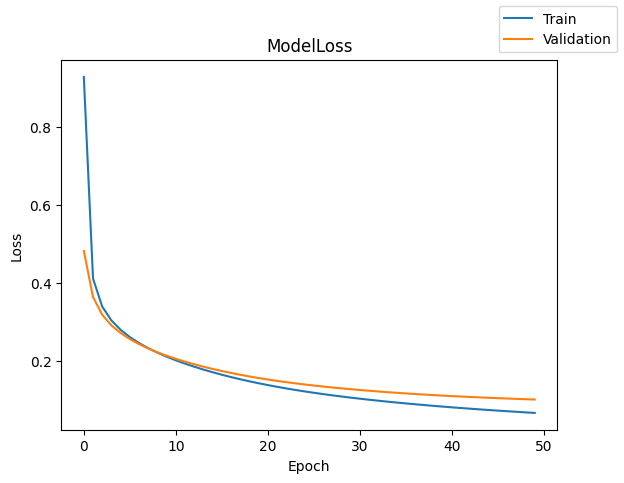

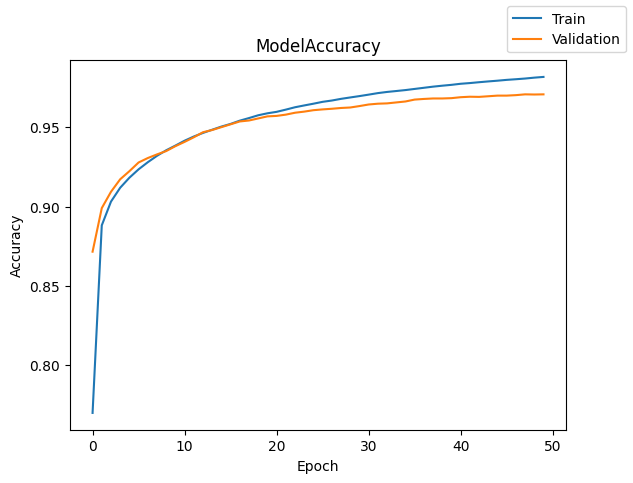

In [125]:
plot(history, 'loss')
plot(history, 'accuracy')

In [126]:
results.loc[11] = [2, [128, 64], ["tanh", "relu"], 50, 64, history.history['loss'][-1], history.history['val_loss'][-1], history.history['accuracy'][-1], history.history['val_accuracy'][-1], round(end-start, 2)]

In [127]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.255773,2.239635,0.15286,0.1606,1.26
1,0,-,-,50,50000,1.928251,1.920950,0.43028,0.4322,4.33
2,0,-,-,10,32,0.329002,0.330422,0.90828,0.9092,4.33
3,0,-,-,50,32,0.258494,0.280753,0.92828,0.9226,4.33
4,0,-,-,50,64,0.292000,0.300083,0.91826,0.9174,28.83
5,1,64,sigmoid,50,50000,2.268572,2.268149,0.14928,0.1487,7.47
6,1,64,sigmoid,50,32,0.195624,0.202316,0.94454,0.9438,73.29
7,1,128,sigmoid,50,32,0.203806,0.210716,0.94176,0.9407,88.16
8,1,128,tanh,50,32,0.073164,0.103856,0.98072,0.9708,83.92
9,1,128,relu,50,64,0.073164,0.103856,0.98072,0.9708,57.55


In [128]:
#Model 12 - Adding another layer and use best activation (relu) across all hidden layers
tf.keras.backend.clear_session()


In [129]:
model=Sequential()
model.add(Dense(128, activation="relu", input_dim=x_train.shape[1]))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))
model.summary()

/opt/anaconda3/envs/tf220/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [130]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

In [131]:
epochs=50
batch_size = 64
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size)
end = time.time()

Epoch 1/50


2025-11-16 09:28:59.158315: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 947us/step - accuracy: 0.6972 - loss: 1.1071 - val_accuracy: 0.8724 - val_loss: 0.4789
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 778us/step - accuracy: 0.8889 - loss: 0.3942 - val_accuracy: 0.9026 - val_loss: 0.3468
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step - accuracy: 0.9091 - loss: 0.3182 - val_accuracy: 0.9141 - val_loss: 0.2992
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 799us/step - accuracy: 0.9197 - loss: 0.2795 - val_accuracy: 0.9245 - val_loss: 0.2687
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 829us/step - accuracy: 0.9284 - loss: 0.2512 - val_accuracy: 0.9310 - val_loss: 0.2450
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step - accuracy: 0.9350 - loss: 0.2283 - val_accuracy: 0.9354 - val_loss: 0.2259
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 879us/step - accuracy: 0.9401 - loss: 0.2088 - val_accuracy: 0.9409 - val_loss: 0.2098
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 885us/step - accuracy: 0.9448 - loss: 0.1921 - val_accurac

In [132]:
print("total time taken: ", end-start)

total time taken:  57.189510107040405


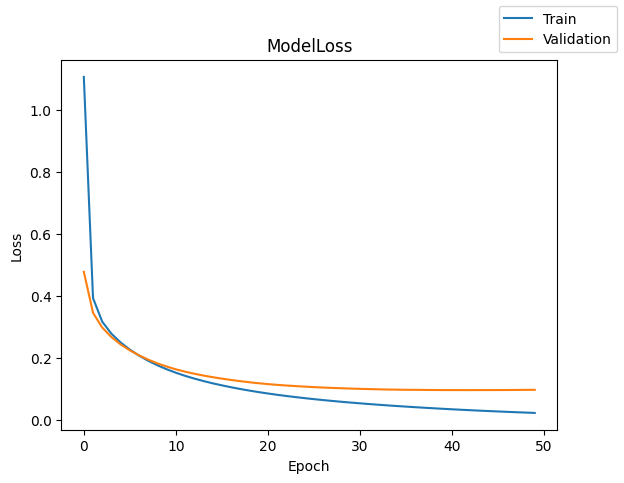

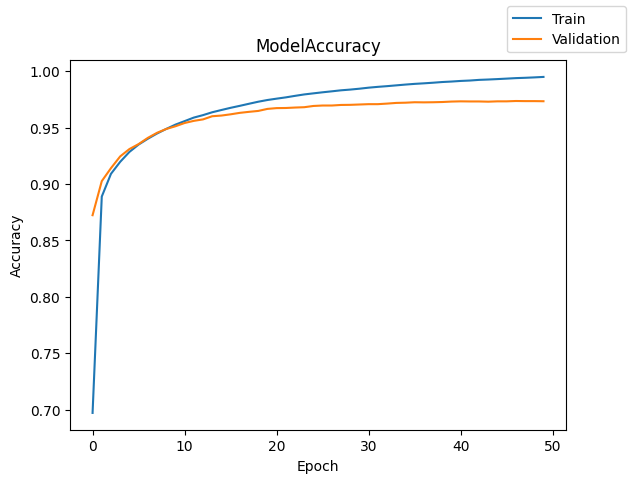

In [133]:
plot(history, "loss")
plot(history, 'accuracy')

In [134]:
results.loc[12] = [3, [128, 64, 32], ["relu", "relu", "relu"], 50, 64, history.history['loss'][-1], history.history['val_loss'][-1], history.history['accuracy'][-1], history.history['val_accuracy'][-1], round(end-start,2)]

In [135]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.255773,2.239635,0.15286,0.1606,1.26
1,0,-,-,50,50000,1.928251,1.920950,0.43028,0.4322,4.33
2,0,-,-,10,32,0.329002,0.330422,0.90828,0.9092,4.33
3,0,-,-,50,32,0.258494,0.280753,0.92828,0.9226,4.33
4,0,-,-,50,64,0.292000,0.300083,0.91826,0.9174,28.83
5,1,64,sigmoid,50,50000,2.268572,2.268149,0.14928,0.1487,7.47
6,1,64,sigmoid,50,32,0.195624,0.202316,0.94454,0.9438,73.29
7,1,128,sigmoid,50,32,0.203806,0.210716,0.94176,0.9407,88.16
8,1,128,tanh,50,32,0.073164,0.103856,0.98072,0.9708,83.92
9,1,128,relu,50,64,0.073164,0.103856,0.98072,0.9708,57.55


In [136]:
#model 13 - Increse the number of epocs in the above model
tf.keras.backend.clear_session()

In [137]:
model = Sequential()
model.add(Dense(128, activation="relu", input_dim=x_train.shape[1]))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))
model.summary()

/opt/anaconda3/envs/tf220/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [138]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

In [139]:
epochs = 100
batch_size=32
start=time.time()
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size)
end = time.time()

Epoch 1/100


2025-11-16 09:30:09.605208: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - accuracy: 0.7890 - loss: 0.7262 - val_accuracy: 0.8977 - val_loss: 0.3479
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 658us/step - accuracy: 0.9148 - loss: 0.2929 - val_accuracy: 0.9247 - val_loss: 0.2605
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step - accuracy: 0.9331 - loss: 0.2289 - val_accuracy: 0.9370 - val_loss: 0.2143
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 714us/step - accuracy: 0.9454 - loss: 0.1889 - val_accuracy: 0.9456 - val_loss: 0.1839
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - accuracy: 0.9532 - loss: 0.1611 - val_accuracy: 0.9502 - val_loss: 0.1629
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - accuracy: 0.9592 - loss: 0.1409 - val_accuracy: 0.9561 - val_loss: 0.1477
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9640 - loss: 0.1252 - val_accuracy: 0.9599 - val_loss: 0.1356
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9682 - loss: 0

total time taken:  188.28933191299438


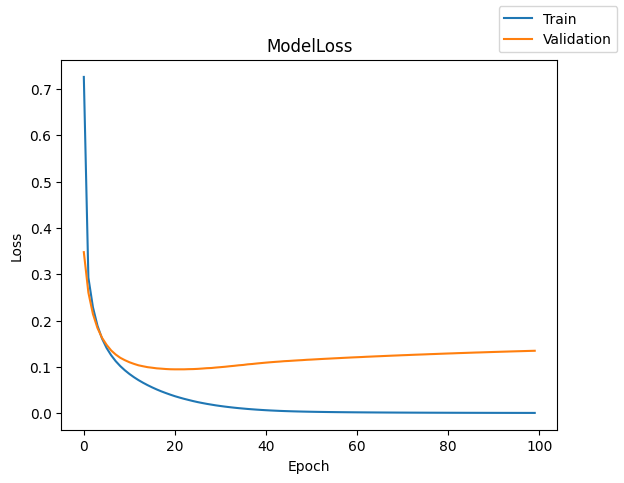

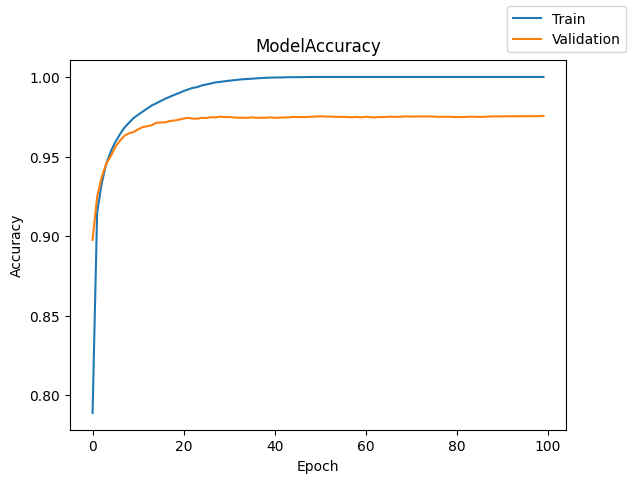

In [140]:
print("total time taken: ", end-start)
plot(history, 'loss')
plot(history, 'accuracy')

In [141]:
results.loc[13] = [3, [128, 64, 32], ["relu", "relu", "relu"], 100, 32, history.history['loss'][-1], history.history['val_accuracy'][-1], history.history['accuracy'][-1], history.history['val_accuracy'][-1], round(end-start, 2)]

In [142]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.255773,2.239635,0.15286,0.1606,1.26
1,0,-,-,50,50000,1.928251,1.920950,0.43028,0.4322,4.33
2,0,-,-,10,32,0.329002,0.330422,0.90828,0.9092,4.33
3,0,-,-,50,32,0.258494,0.280753,0.92828,0.9226,4.33
4,0,-,-,50,64,0.292000,0.300083,0.91826,0.9174,28.83
5,1,64,sigmoid,50,50000,2.268572,2.268149,0.14928,0.1487,7.47
6,1,64,sigmoid,50,32,0.195624,0.202316,0.94454,0.9438,73.29
7,1,128,sigmoid,50,32,0.203806,0.210716,0.94176,0.9407,88.16
8,1,128,tanh,50,32,0.073164,0.103856,0.98072,0.9708,83.92
9,1,128,relu,50,64,0.073164,0.103856,0.98072,0.9708,57.55
